# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 2️⃣**
### 영화 평점과 흥행 수익 간의 상관관계 분석 

#### 사용자 평점, 비평가 평점, 박스오피스 수익 간의 관계를 분석하고, 평점이 높지만 흥행하지 못한 영화와 평점은 낮지만 흥행한 영화들의 특성을 비교 분석하세요.

#### **1. 상관관계 분석 및 산점도 시각화:**

상관관계 분석
상관관계 분석은 두 변수 사이의 선형 관계 강도를 정량적으로 나타내는 데 사용됨.

평점(vote_average)과 흥행 수익(revenue) 두 변수 간의 관계를 산점도(scatter plot)로 그려보기.
x축을 평점, y축을 수익으로 두면 평점이 높을수록 수익이 높아지는 경향을 시각적으로 확인 가능.

- 데이터 정제: vote_average, vote_average_naver, critic_average, revenue, audience_total 열에 누락된 값이 있는지 확인하고, 필요시 해당 행을 제거하거나 대체해야 합니다.
- 상관관계 계산: 사용자 평점(vote_average 또는 vote_average_naver)과 비평가 평점(critic_average), 그리고 흥행 수익(revenue 또는 audience_total) 간의 피어슨 상관계수를 계산합니다. 이는 두 변수가 얼마나 강한 선형 관계를 가지는지 보여줍니다.
- 시각화: vote_average와 revenue를 각각 x, y축으로 하는 산점도를 그려 시각적으로 상관관계를 확인합니다. 비평가 평점과 흥행 수익에 대해서도 같은 작업을 반복합니다.

In [14]:
import pandas as pd
from IPython.display import display
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_weekly_final.csv'

# 데이터 로드
try:
    df = pd.read_csv(file_path)
    print(f"전체 데이터 수: {len(df):,}개")
    
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
    exit()
except Exception as e:
    print(f"데이터 로드 오류: {e}")
    exit()

# 분석에 필요한 컬럼만 선택 및 결측값 제거
analysis_columns = ['vote_average_naver', 'critic_average', 'revenue', 'audience_total']
analysis_df = df[analysis_columns].dropna()

print(f"분석 데이터 수: {len(analysis_df):,}개")

# 상관관계 분석
correlation_matrix = analysis_df.corr()

print(f"\n📊 변수 간 상관관계 행렬:")
display(correlation_matrix.round(4))

# 주요 상관관계를 DataFrame으로 정리
correlations_data = []
correlation_pairs = [
    ('사용자 평점', '흥행 수익', 'vote_average_naver', 'revenue'),
    ('비평가 평점', '흥행 수익', 'critic_average', 'revenue'),
    ('사용자 평점', '비평가 평점', 'vote_average_naver', 'critic_average'),
    ('흥행 수익', '총 관객수', 'revenue', 'audience_total')
]

for name1, name2, col1, col2 in correlation_pairs:
    corr_value = correlation_matrix.loc[col1, col2]
    correlations_data.append({
        '변수1': name1,
        '변수2': name2,
        '상관계수': round(corr_value, 4)
    })

correlation_df = pd.DataFrame(correlations_data)
correlation_df.index = range(1, len(correlation_df) + 1)

print(f"\n📈 주요 상관관계 분석:")
display(correlation_df)

# 상관관계 해석 추가
print(f"\n💡 상관관계 분석 결과 해석:")
interpretation_data = []

for _, row in correlation_df.iterrows():
    corr_value = row['상관계수']
    var1 = row['변수1']
    var2 = row['변수2']
    
    if corr_value >= 0.7:
        strength = "강한 양의 상관관계"
    elif corr_value >= 0.3:
        strength = "보통 양의 상관관계"
    elif corr_value >= -0.3:
        strength = "약한 상관관계"
    elif corr_value >= -0.7:
        strength = "보통 음의 상관관계"
    else:
        strength = "강한 음의 상관관계"
    
    interpretation_data.append({
        '변수 조합': f"{var1} - {var2}",
        '상관계수': corr_value,
        '해석': strength
    })

interpretation_df = pd.DataFrame(interpretation_data)
interpretation_df.index = range(1, len(interpretation_df) + 1)

display(interpretation_df)

전체 데이터 수: 927개
분석 데이터 수: 835개

📊 변수 간 상관관계 행렬:


,vote_average_naver,critic_average,revenue,audience_total
vote_average_naver,1.0000,0.3696,0.2214,0.2331
critic_average,0.3696,1.0000,0.1970,0.1969
revenue,0.2214,0.1970,1.0000,0.9948
audience_total,0.2331,0.1969,0.9948,1.0000



📈 주요 상관관계 분석:


,변수1,변수2,상관계수
1,사용자 평점,흥행 수익,0.2214
2,비평가 평점,흥행 수익,0.1970
3,사용자 평점,비평가 평점,0.3696
4,흥행 수익,총 관객수,0.9948



💡 상관관계 분석 결과 해석:


,변수 조합,상관계수,해석
1,사용자 평점 - 흥행 수익,0.2214,약한 상관관계
2,비평가 평점 - 흥행 수익,0.1970,약한 상관관계
3,사용자 평점 - 비평가 평점,0.3696,보통 양의 상관관계
4,흥행 수익 - 총 관객수,0.9948,강한 양의 상관관계


전체 데이터 수: 927개
분석 데이터 수: 835개

📈 그래프 생성 완료!


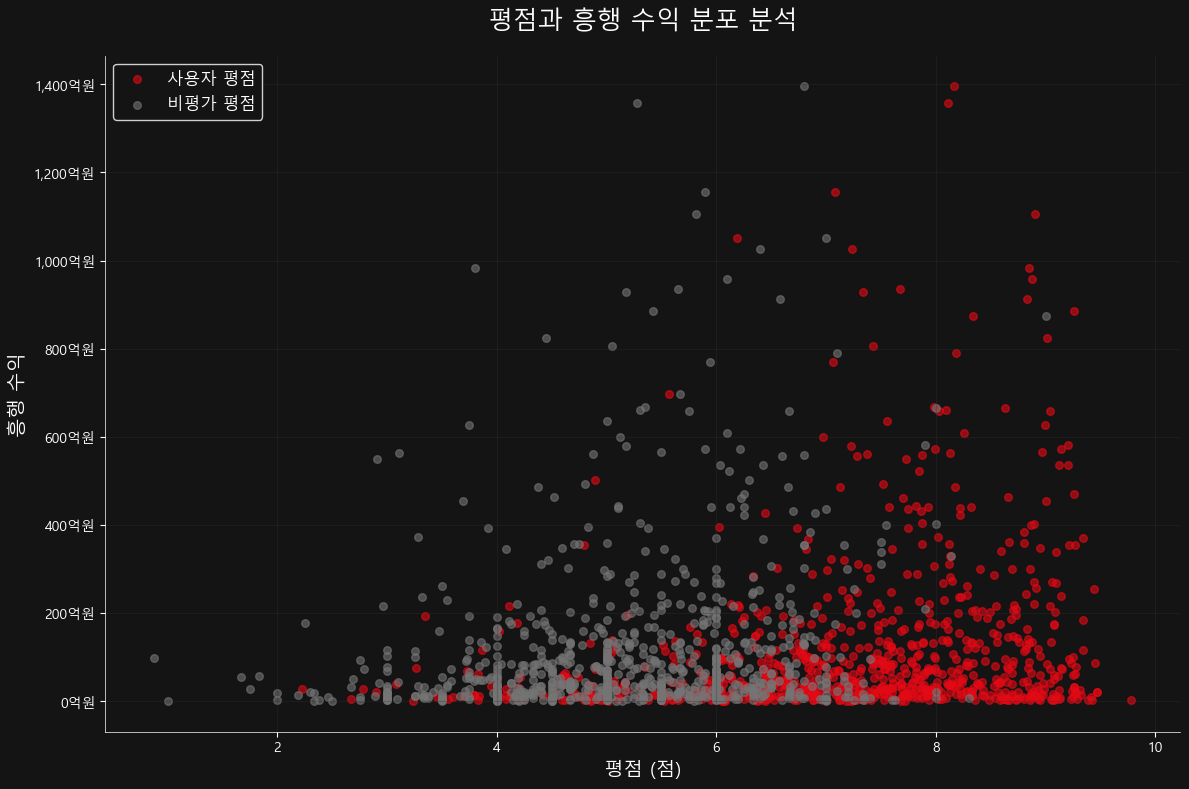

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_weekly_final.csv'

# 데이터 로드
df = pd.read_csv(file_path)

print(f"전체 데이터 수: {len(df):,}개")

# 분석에 필요한 컬럼만 선택 및 결측값 제거
analysis_columns = ['vote_average_naver', 'critic_average', 'revenue']
analysis_df = df[analysis_columns].dropna()

print(f"분석 데이터 수: {len(analysis_df):,}개")

# Netflix 스타일 설정
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Netflix 색상 팔레트
netflix_red = '#e50914'
netflix_dark = '#141414'
netflix_gray = '#757575'
netflix_light_gray = '#b3b3b3'
netflix_dark_gray = '#333333'

# y축 포매터 함수
def y_formatter(y, pos):
    return f'{y/1e8:,.0f}억원'

# 산점도 생성
fig, ax = plt.subplots(figsize=(12, 8), facecolor=netflix_dark)

# 사용자 평점 vs 흥행 수익
ax.scatter(x=analysis_df['vote_average_naver'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_red, 
           label='사용자 평점',
           s=30)

# 비평가 평점 vs 흥행 수익
ax.scatter(x=analysis_df['critic_average'], 
           y=analysis_df['revenue'], 
           alpha=0.6,
           c=netflix_gray, 
           label='비평가 평점',
           s=30)

# 그래프 설정
ax.set_title('평점과 흥행 수익 분포 분석', fontsize=18, color='white', pad=20)
ax.set_xlabel('평점 (점)', fontsize=14, color='white')
ax.set_ylabel('흥행 수익', fontsize=14, color='white')

# y축 포맷터 적용
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# 그래프 스타일링
ax.grid(True, color=netflix_dark_gray, alpha=0.3)
ax.tick_params(colors='white')
ax.set_facecolor(netflix_dark)

# 테두리 설정
for spine in ax.spines.values():
    spine.set_color('white')
    spine.set_linewidth(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 범례 설정
legend = ax.legend(frameon=True, fontsize=12, loc='upper left',
                   facecolor=netflix_dark, edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# 레이아웃 조정
plt.tight_layout()
fig.patch.set_facecolor(netflix_dark)

print(f"\n📈 그래프 생성 완료!")
plt.show()

---

## 고흥행&저평점 | 저흥행&고평점 그룹별 특성 분석
- 그룹별 제작사, 장르, 개봉 월 빈도수 및 비율 분석

In [13]:
import pandas as pd
import numpy as np
import warnings
import ast
from collections import Counter
from IPython.display import display

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_weekly_final.csv'

# 데이터 로드
df = pd.read_csv(file_path)

print(f"전체 데이터 수: {len(df):,}개")

# 분석에 필요한 컬럼 선택
analysis_columns = ['title', 'release_month', 'revenue', 'vote_average', 'genres', 'director_name_ko', 'cast_names_ko', 'production_companies']
analysis_df = df[analysis_columns].copy()

# 결측값 제거
analysis_df.dropna(subset=['revenue', 'vote_average', 'release_month'], inplace=True)

print(f"분석 데이터 수: {len(analysis_df):,}개")

# 장르 데이터 전처리
analysis_df['genres'] = analysis_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 감독/출연진 데이터 전처리
analysis_df['director_name_ko'] = analysis_df['director_name_ko'].apply(lambda x: [d.strip() for d in str(x).split('|') if d.strip()])
analysis_df['cast_names_ko'] = analysis_df['cast_names_ko'].apply(lambda x: [c.strip() for c in str(x).split('|') if c.strip()])

# 제작사 데이터 전처리
def get_all_company_names_list(companies_str):
    company_names = []
    try:
        companies_list = ast.literal_eval(companies_str)
        if companies_list and isinstance(companies_list, list):
            for item in companies_list:
                if isinstance(item, dict):
                    name = item.get('companyNm')
                    if name:
                        company_names.append(name)
                elif isinstance(item, str):
                    company_names.append(item)
    except (ValueError, SyntaxError):
        pass
    return company_names

analysis_df['제작사_리스트'] = analysis_df['production_companies'].apply(get_all_company_names_list)
analysis_df['제작사'] = analysis_df['제작사_리스트'].apply(lambda x: ", ".join(x) if x else '알 수 없음')

# 수익/평점 기준 설정
revenue_high_threshold = analysis_df['revenue'].quantile(0.70)
revenue_low_threshold = analysis_df['revenue'].quantile(0.30)

print(f"고흥행 기준: {revenue_high_threshold/1e8:.1f}억원 이상")
print(f"저흥행 기준: {revenue_low_threshold/1e8:.1f}억원 이하")

# 평점 기준 (3등급 분할)
analysis_df['rating_ntile'] = pd.qcut(analysis_df['vote_average'], 3, labels=False, duplicates='drop')

# 영화 그룹 분류
def classify_movie_revised(row):
    is_high_revenue = row['revenue'] >= revenue_high_threshold
    is_low_revenue = row['revenue'] <= revenue_low_threshold
    is_high_rating = row['rating_ntile'] == 2
    is_low_rating = row['rating_ntile'] == 0
    
    if is_high_revenue and is_low_rating:
        return '저평점 & 고흥행'
    elif is_low_revenue and is_high_rating:
        return '고평점 & 저흥행'
    else:
        return '기타'

analysis_df['group'] = analysis_df.apply(classify_movie_revised, axis=1)

# 그룹별 데이터 추출
low_rating_high_revenue_df = analysis_df[analysis_df['group'] == '저평점 & 고흥행']
high_rating_low_revenue_df = analysis_df[analysis_df['group'] == '고평점 & 저흥행']

low_rating_high_revenue_count = len(low_rating_high_revenue_df)
high_rating_low_revenue_count = len(high_rating_low_revenue_df)

print(f"\n📊 영화 그룹 분류 결과:")
print(f"저평점 & 고흥행 그룹: {low_rating_high_revenue_count}편")
print(f"고평점 & 저흥행 그룹: {high_rating_low_revenue_count}편")

# 저평점 & 고흥행 영화 리스트
print(f"\n🎬 저평점 & 고흥행 그룹 영화 리스트:")
low_high_display = low_rating_high_revenue_df[['title', 'vote_average', 'revenue', 'genres', 'release_month', '제작사']].copy()
low_high_display['revenue'] = low_high_display['revenue'].apply(lambda x: f"{x/1e8:.1f}억원")
low_high_display['genres'] = low_high_display['genres'].apply(lambda x: ', '.join(x) if x else '알 수 없음')
low_high_display.columns = ['영화제목', '평점', '흥행수익', '장르', '개봉월', '제작사']
low_high_display.index = range(1, len(low_high_display) + 1)
display(low_high_display)

# 고평점 & 저흥행 영화 리스트
print(f"\n🎬 고평점 & 저흥행 그룹 영화 리스트:")
high_low_display = high_rating_low_revenue_df[['title', 'vote_average', 'revenue', 'genres', 'release_month', '제작사']].copy()
high_low_display['revenue'] = high_low_display['revenue'].apply(lambda x: f"{x/1e8:.1f}억원")
high_low_display['genres'] = high_low_display['genres'].apply(lambda x: ', '.join(x) if x else '알 수 없음')
high_low_display.columns = ['영화제목', '평점', '흥행수익', '장르', '개봉월', '제작사']
high_low_display.index = range(1, len(high_low_display) + 1)
display(high_low_display)

# 제작사 분석 함수
def analyze_companies_by_df_with_ratio(group_df, total_movies):
    all_companies = [company for sublist in group_df['제작사_리스트'] for company in sublist]
    company_counts = Counter(all_companies)
    df_counts = pd.DataFrame(company_counts.most_common(10), columns=['제작사', '빈도수'])
    df_counts['비율(%)'] = (df_counts['빈도수'] / total_movies * 100).round(2)
    df_counts.index = range(1, len(df_counts) + 1)
    return df_counts

# 저평점 & 고흥행 그룹 제작사 분석
print(f"\n🏢 저평점 & 고흥행 영화의 주요 제작사:")
df_low_high_company = analyze_companies_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
display(df_low_high_company)

# 고평점 & 저흥행 그룹 제작사 분석
print(f"\n🏢 고평점 & 저흥행 영화의 주요 제작사:")
df_high_low_company = analyze_companies_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)
display(df_high_low_company)

# 장르 분석 함수
def analyze_genres_by_df_with_ratio(group_df, total_movies):
    all_genres = [genre for sublist in group_df['genres'] for genre in sublist]
    genre_counts = Counter(all_genres)
    df_counts = pd.DataFrame(genre_counts.most_common(10), columns=['장르', '빈도수'])
    df_counts['비율(%)'] = (df_counts['빈도수'] / total_movies * 100).round(2)
    df_counts.index = range(1, len(df_counts) + 1)
    return df_counts

# 저평점 & 고흥행 그룹 장르 분석
print(f"\n🎭 저평점 & 고흥행 영화의 주요 장르:")
df_low_high_genre = analyze_genres_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
display(df_low_high_genre)

# 고평점 & 저흥행 그룹 장르 분석
print(f"\n🎭 고평점 & 저흥행 영화의 주요 장르:")
df_high_low_genre = analyze_genres_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)
display(df_high_low_genre)

# 개봉월 분석 함수
def analyze_months_by_df_with_ratio(group_df, total_movies):
    all_months = group_df['release_month'].tolist()
    month_counts = Counter(all_months)
    df_counts = pd.DataFrame(month_counts.most_common(), columns=['개봉월', '빈도수'])
    df_counts['비율(%)'] = (df_counts['빈도수'] / total_movies * 100).round(2)
    df_counts = df_counts.sort_values(by='개봉월', ascending=True)
    df_counts.index = range(1, len(df_counts) + 1)
    return df_counts

# 저평점 & 고흥행 그룹 개봉월 분석
print(f"\n📅 저평점 & 고흥행 영화의 개봉월 분포:")
df_low_high_month = analyze_months_by_df_with_ratio(low_rating_high_revenue_df, low_rating_high_revenue_count)
display(df_low_high_month)

# 고평점 & 저흥행 그룹 개봉월 분석
print(f"\n📅 고평점 & 저흥행 영화의 개봉월 분포:")
df_high_low_month = analyze_months_by_df_with_ratio(high_rating_low_revenue_df, high_rating_low_revenue_count)
display(df_high_low_month)

전체 데이터 수: 927개
분석 데이터 수: 925개
고흥행 기준: 103.5억원 이상
저흥행 기준: 20.8억원 이하

📊 영화 그룹 분류 결과:
저평점 & 고흥행 그룹: 54편
고평점 & 저흥행 그룹: 74편

🎬 저평점 & 고흥행 그룹 영화 리스트:


,영화제목,평점,흥행수익,장르,개봉월,제작사
1,마파도,6.141,166.3억원,코미디,3,"코리아 엔터테인먼트, 씨제이엔터테인먼트, 씨제이엔터테인먼트, 무비클로저, 세방현상(주)"
2,가문의 위기,6.330,284.9억원,코미디,9,"(주)태원엔터테인먼트, (주)쇼박스, (주)쇼박스, (주)쇼박스, 세방현상(주), ..."
3,작업의 정석,6.541,116.6억원,코미디,12,"영화사청어람(주), (주)쇼박스, 영화사청어람(주), (주)쇼박스, 영화사청어람(주..."
4,태풍,6.131,221.1억원,"드라마, 액션",12,"씨제이엔터테인먼트, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜라이브톤, 세방현상(주..."
5,투사부일체,3.271,314.7억원,코미디,1,"(주)시네마제니스 , 씨제이엔터테인먼트, 씨제이엔터테인먼트, (사)부산영상위원회"
6,한반도,6.371,203.8억원,"드라마, 액션",7,"(주)시네마서비스글로벌, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜블루캡, 빔필름 ..."
7,가문의 부활 - 가문의 영광3,4.021,159.3억원,코미디,9,"(주)태원엔터테인먼트, (주)쇼박스, (주)쇼박스, 보스톤 창업투자(주), (주)쇼..."
8,바람피기 좋은 날,5.811,106.9억원,"드라마, 멜로/로맨스, 코미디",2,"(주)아이필름홀딩스, (주)시네마서비스, (주)시네마서비스, (주)아이에이치큐, ㈜..."
9,아내가 결혼했다,5.081,119.5억원,"멜로/로맨스, 드라마",10,"(주)주피터필름, 씨제이엔터테인먼트, 소빅창업투자(주), 씨제이엔터테인먼트, 씨 47"
10,미인도,6.390,156.3억원,"사극, 드라마, 멜로/로맨스",11,"㈜이룸영화사, (주)영화사참, 씨제이엔터테인먼트, 아시아문화기술투자(주), 씨제이엔..."



🎬 고평점 & 저흥행 그룹 영화 리스트:


,영화제목,평점,흥행수익,장르,개봉월,제작사
1,미스터 주부퀴즈왕,8.001,19.7억원,코미디,9,"폴스타엔터테인먼트, (주)쇼박스, (주)쇼박스, (주)쇼박스, 세방현상(주), (사..."
2,"사랑해, 말순씨",8.051,20.3억원,드라마,11,"블루스톰(주), 쇼이스트(주), 쇼이스트(주), 엠라인디스트리뷰션(주), ㈜라이브톤"
3,가족의 탄생,8.591,11.5억원,드라마,5,"블루스톰(주), 롯데쇼핑㈜롯데엔터테인먼트, 롯데쇼핑㈜롯데엔터테인먼트, 블루스톰(주)..."
4,국경의 남쪽,8.491,14.2억원,드라마,5,"(주)싸이더스, 씨제이엔터테인먼트, 씨제이엔터테인먼트, ㈜라이브톤, 창고사람들, 세..."
5,파이스토리,8.691,12.9억원,"애니메이션, 가족",7,"(주)에펙스디지탈, 원더월드 LLC, ㈜디지아트프로덕션, 씨제이엔터테인먼트, 소빅창..."
...,...,...,...,...,...,...
70,어린 의뢰인,9.070,16.1억원,"드라마, 가족",5,"이스트드림시노펙스(주), 롯데컬처웍스(주)롯데엔터테인먼트, 이스트드림시노펙스(주),..."
71,김복동,8.670,2.5억원,다큐멘터리,8,"한국탐사저널리즘센터, (주)엣나인필름, (주)엣나인필름"
72,벌새,8.640,7.7억원,드라마,8,"에피파니(주), (주)엣나인필름, (주)콘텐츠판다, (주)콘텐츠판다, (주)콘텐츠판다"
73,극장판 반지의 비밀일기,9.050,4.6억원,애니메이션,9,"(주)쏘울 크리에이티브, 주식회사 애니맥스브로드캐스팅코리아, (주)영화사 빅, (주..."



🏢 저평점 & 고흥행 영화의 주요 제작사:


,제작사,빈도수,비율(%)
1,씨제이엔터테인먼트,35,64.81
2,(주)씨제이이엔엠,30,55.56
3,(사)한국농아인협회,24,44.44
4,한국시각장애인연합회,24,44.44
5,(주)쇼박스,21,38.89
6,(주)넥스트엔터테인먼트월드(NEW),19,35.19
7,롯데쇼핑㈜롯데엔터테인먼트,12,22.22
8,(주)콘텐츠판다,10,18.52
9,영화사청어람(주),6,11.11
10,롯데컬처웍스(주)롯데엔터테인먼트,6,11.11



🏢 고평점 & 저흥행 영화의 주요 제작사:


,제작사,빈도수,비율(%)
1,롯데쇼핑㈜롯데엔터테인먼트,18,24.32
2,(주)쇼박스,16,21.62
3,(사)한국농아인협회,12,16.22
4,한국시각장애인연합회,12,16.22
5,(주)리틀빅픽쳐스,11,14.86
6,(주)넥스트엔터테인먼트월드(NEW),9,12.16
7,씨제이엔터테인먼트,8,10.81
8,(주)엣나인필름,8,10.81
9,세방현상(주),7,9.46
10,엠라인디스트리뷰션(주),7,9.46



🎭 저평점 & 고흥행 영화의 주요 장르:


,장르,빈도수,비율(%)
1,드라마,24,44.44
2,코미디,17,31.48
3,액션,17,31.48
4,범죄,9,16.67
5,멜로/로맨스,8,14.81
6,스릴러,8,14.81
7,사극,4,7.41
8,공포(호러),3,5.56
9,SF,2,3.70
10,어드벤처,2,3.70



🎭 고평점 & 저흥행 영화의 주요 장르:


,장르,빈도수,비율(%)
1,드라마,43,58.11
2,애니메이션,13,17.57
3,다큐멘터리,10,13.51
4,코미디,9,12.16
5,멜로/로맨스,8,10.81
6,가족,6,8.11
7,액션,3,4.05
8,어드벤처,2,2.70
9,판타지,1,1.35
10,스릴러,1,1.35



📅 저평점 & 고흥행 영화의 개봉월 분포:


,개봉월,빈도수,비율(%)
1,1,3,5.56
2,2,6,11.11
3,3,3,5.56
4,4,1,1.85
5,5,3,5.56
6,7,3,5.56
7,8,8,14.81
8,9,7,12.96
9,10,6,11.11
10,11,5,9.26



📅 고평점 & 저흥행 영화의 개봉월 분포:


,개봉월,빈도수,비율(%)
1,1,9,12.16
2,2,3,4.05
3,3,6,8.11
4,4,11,14.86
5,5,9,12.16
6,6,2,2.70
7,7,3,4.05
8,8,7,9.46
9,9,7,9.46
10,10,6,8.11
